# **Convolutions, Blurring and Sharpening Images**

1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Convolution is a mathematical operation that combines two functions to produce a third function. In image processing, it's like applying a small filter (a matrix) over an image to detect patterns, blur, sharpen, or enhance details.

### **Blurring using Convolutions**

We divide by 9 in the kernel: to ensure the overall brightness remains the same after applying the filter.If we don't divide by 9, the sum of all elements is 9, meaning every pixel's value would be multiplied by 9 during convolution, making the image much brighter.
By dividing by 9, we make sure the sum of the kernel is 1:

Without Division?
The image would become too bright because pixel values get scaled up.
Normalizing (dividing by the sum) prevents this issue.

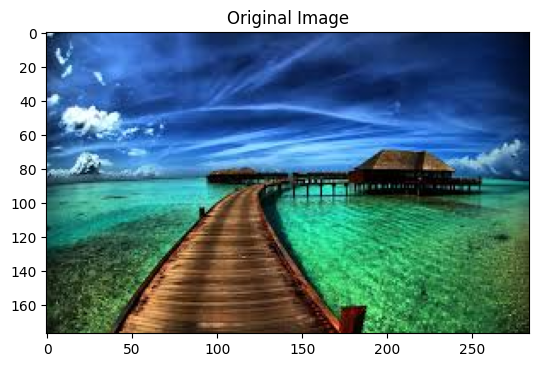

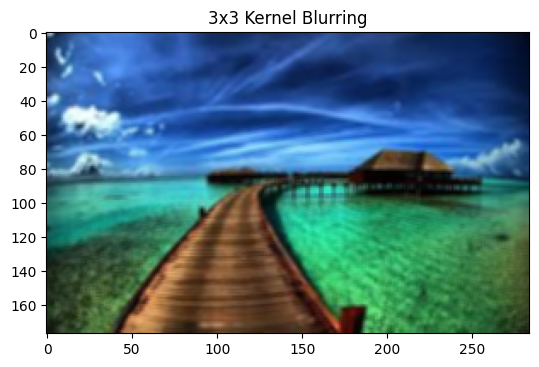

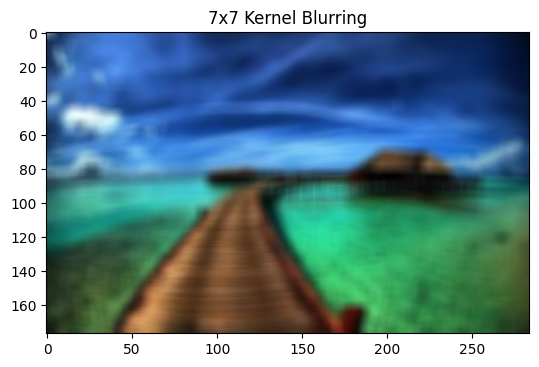

In [5]:
import cv2
import numpy as np

image = cv2.imread('nature.jpeg')
imshow('Original Image', image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32)/9    #divide by 9 to keep brightness consistent

# We use the cv2.fitler2D to conovlve the kernal with an image
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

# The -1 means the output image will have the same depth as the input image.

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring


#### Averaging (cv2.blur)

Uses a simple box filter that replaces the central pixel with the average of surrounding pixels.
Good for reducing noise but might produce a blocky effect.

#### Gaussian Blurring (cv2.GaussianBlur)

Uses a Gaussian-weighted kernel instead of a simple box filter.
Smoother & more natural than box blur.
Good for removing Gaussian noise.

#### Median Blurring (cv2.medianBlur)

Replaces each pixel with the median of neighboring pixels.
Very effective for salt-and-pepper noise.
Preserves edges better than other methods.

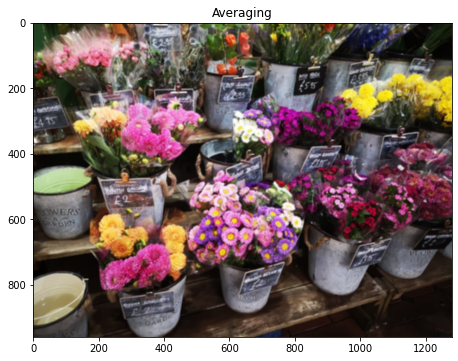

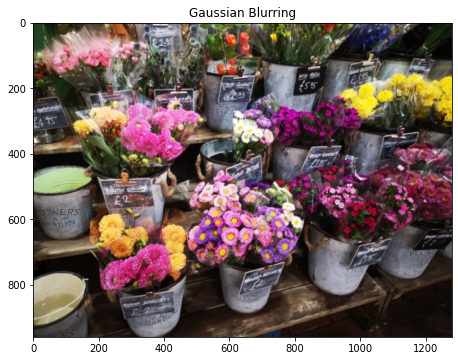

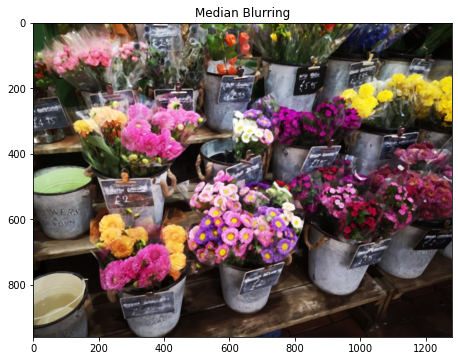

In [ ]:
import cv2
import numpy as np

image = cv2.imread('nature.jpeg')

# Averaging done by convolving the image with a normalized box filter.
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **Bilateral Filter**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

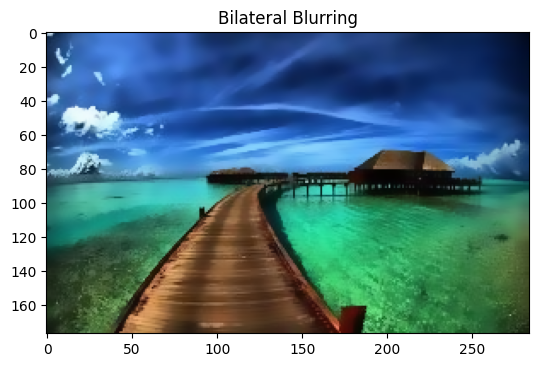

In [6]:
# Bilateral is very effective in noise removal while keeping edges sharp, noise removal function
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

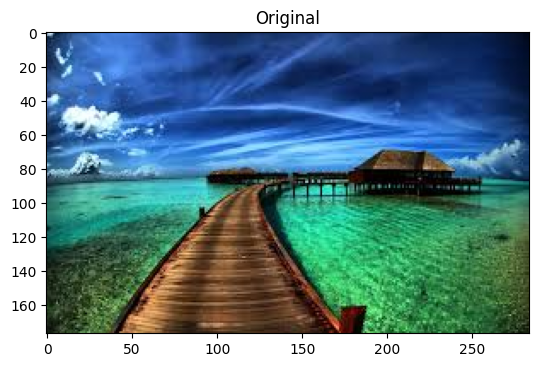

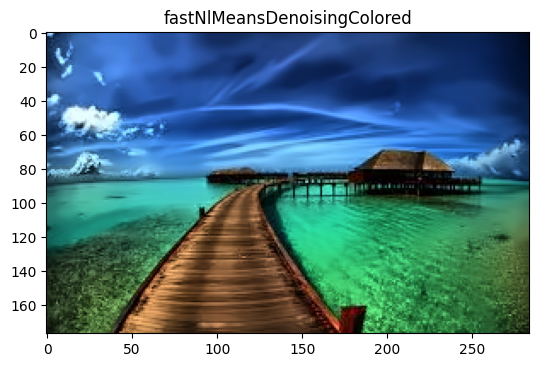

In [7]:
image = cv2.imread('nature.jpeg')
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

### **Sharpening Images**

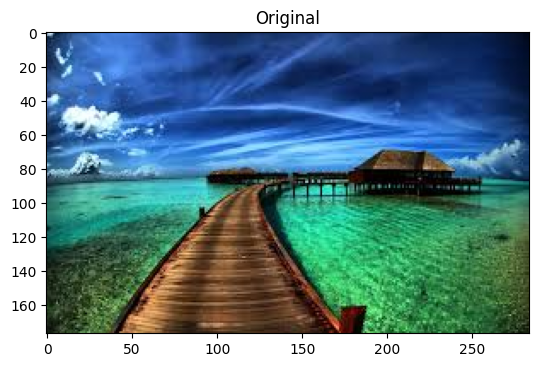

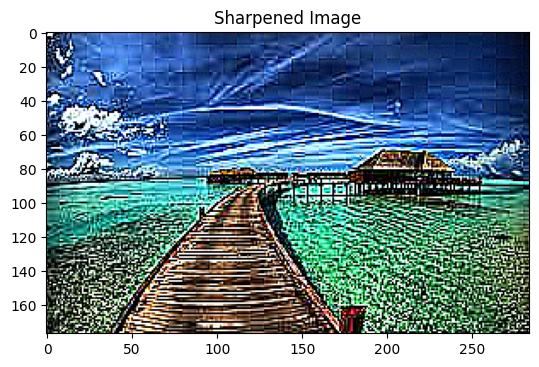

In [8]:
# Loading our image
image = cv2.imread('nature.jpeg')
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)

The center (9) increases the intensity of the central pixel.
The negative values (-1) subtract surrounding pixel values, enhancing edges.
This makes edges pop while keeping the overall brightness balanced.
sum is 1, meaning it enhances edges while preserving brightness.